In [37]:
import numpy as np
import torch
import sys
sys.path.append('..')
import swag
import models

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
model_cfg = models.VGG16
swag_model = swag.SWAG(model_cfg.base, *model_cfg.args, num_classes=100, *model_cfg.kwargs)

In [40]:
ckpt = torch.load('../ckpts/swag-300.pt')
swag_model.load_state_dict(ckpt['state_dict'])

In [41]:
mean, var = swag_model.export_numpy_params()

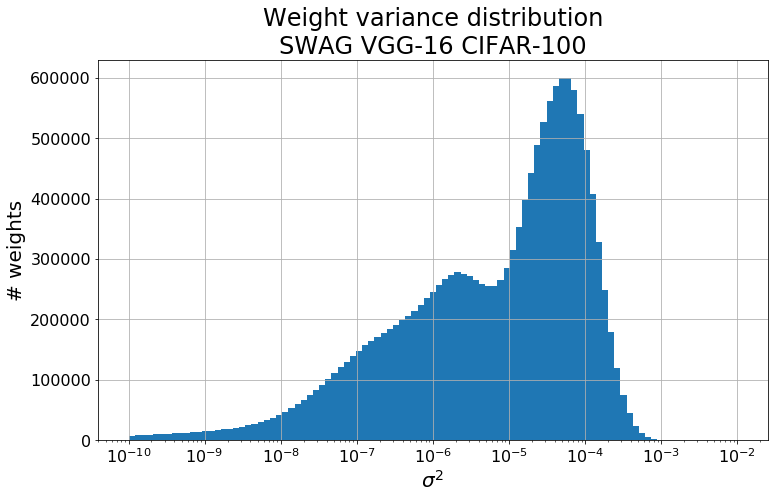

In [42]:
plt.figure(figsize=(12, 7))
plt.title('Weight variance distribution\nSWAG VGG-16 CIFAR-100', fontsize=24)
plt.xscale('log')
bins = 10 ** np.linspace(-10, -2, 100)
plt.hist(var, bins=bins)
plt.xlabel('$\sigma^2$', fontsize=20)
plt.ylabel('# weights', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid()
plt.show()

In [43]:
snr = mean ** 2 / var

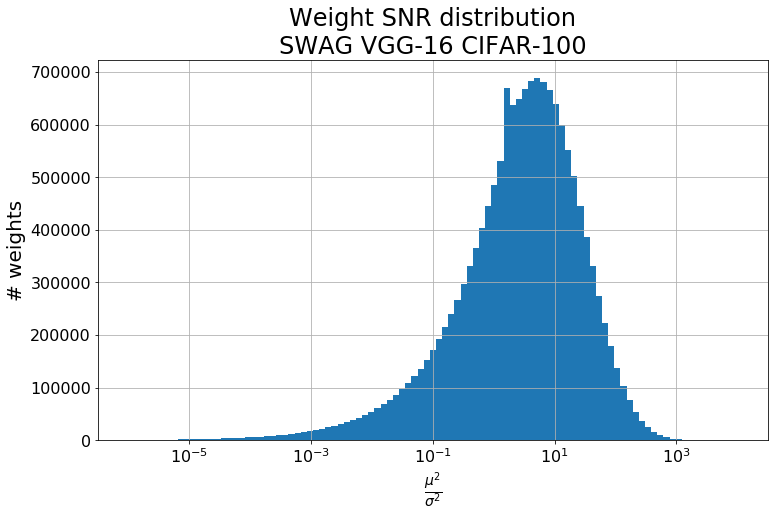

In [44]:
plt.figure(figsize=(12, 7))
plt.title('Weight SNR distribution\nSWAG VGG-16 CIFAR-100', fontsize=24)
plt.xscale('log')
bins = 10 ** np.linspace(-6, 4, 100)
plt.hist(snr, bins=bins)
plt.xlabel('$\\frac{\\mu^2}{\\sigma^2}$', fontsize=20)
plt.ylabel('# weights', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid()
plt.show()

In [28]:
snr.min()

1.197638e-12